# House price analysis

## Credit to Pedro Marcelino [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the DATA_DIR directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
DATA_DIR="data-temp"
print(check_output(["ls", DATA_DIR]).decode("utf8"))

# Any results you write to the current directory are saved as output.

data_description.txt
sample_submission.csv
test.csv
train.csv



## Load data. Download from:https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [11]:

train_data = pd.read_csv(DATA_DIR + "/train.csv")
test_data =  pd.read_csv(DATA_DIR + "/test.csv")
combine_data = pd.concat([train_data,test_data])
#train_data.head(5)
combine_data.head(5)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [12]:
combine_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [16]:
print("Train data size:",len(train_data))
print("Test data size:", len(test_data))
print("Total data size:", len(combine_data))

Train data size: 1460
Test data size: 1459
Total data size: 2919


### Check if any cell has NULL value

In [21]:
combine_data.isnull().any()

1stFlrSF         False
2ndFlrSF         False
3SsnPorch        False
Alley             True
BedroomAbvGr     False
BldgType         False
BsmtCond          True
BsmtExposure      True
BsmtFinSF1        True
BsmtFinSF2        True
BsmtFinType1      True
BsmtFinType2      True
BsmtFullBath      True
BsmtHalfBath      True
BsmtQual          True
BsmtUnfSF         True
CentralAir       False
Condition1       False
Condition2       False
Electrical        True
EnclosedPorch    False
ExterCond        False
ExterQual        False
Exterior1st       True
Exterior2nd       True
Fence             True
FireplaceQu       True
Fireplaces       False
Foundation       False
FullBath         False
                 ...  
LotShape         False
LowQualFinSF     False
MSSubClass       False
MSZoning          True
MasVnrArea        True
MasVnrType        True
MiscFeature       True
MiscVal          False
MoSold           False
Neighborhood     False
OpenPorchSF      False
OverallCond      False
OverallQual

## Analyse SalePrice

In [23]:
train_data['SalePrice'].isnull().any()

False

In [6]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

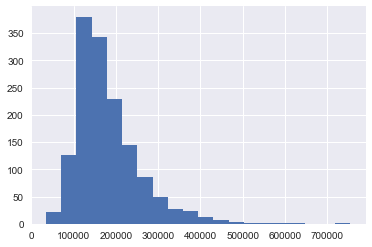

In [7]:
#histogram
#sns.distplot(train_data['SalePrice']);
train_data['SalePrice'].hist(bins=20)

## Check correlation between SalePrice and other columns. Columns have strong relationship with Saleprice will have bigger corr value.

In [25]:
correlation = train_data.corr()['SalePrice'].sort_values()
print(correlation)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

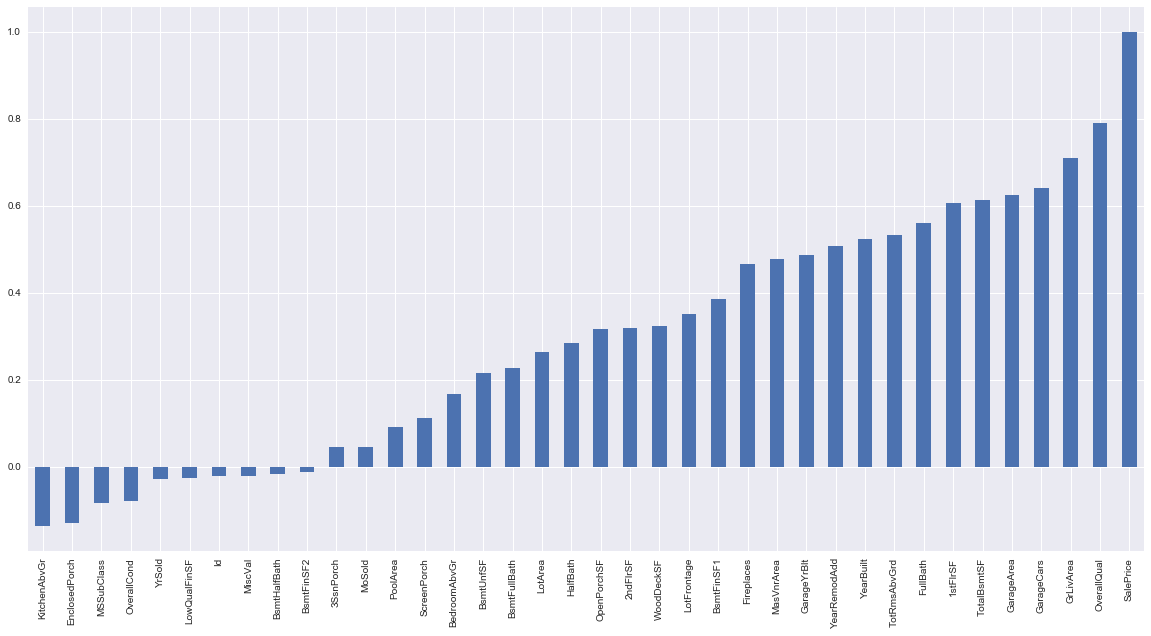

In [26]:
correlation.plot.bar(figsize=(20,10), sort_columns = True)

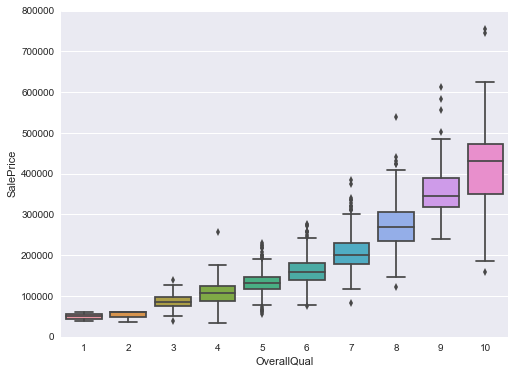

In [29]:
var = 'OverallQual'
qual_data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=qual_data)
fig.axis(ymin=0, ymax=800000);


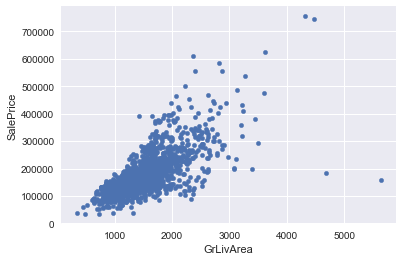

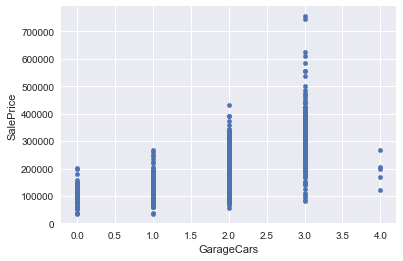

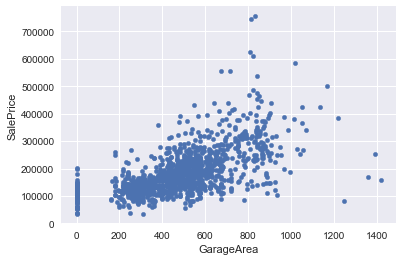

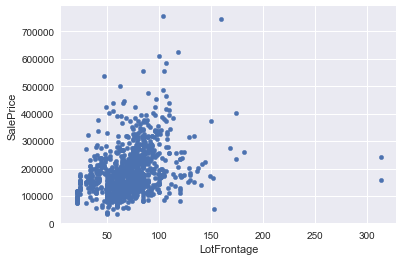

In [30]:
train_data.plot.scatter(x='GrLivArea', y='SalePrice')
train_data.plot.scatter(x='GarageCars', y='SalePrice')
train_data.plot.scatter(x='GarageArea', y='SalePrice')
train_data.plot.scatter(x='LotFrontage', y='SalePrice')

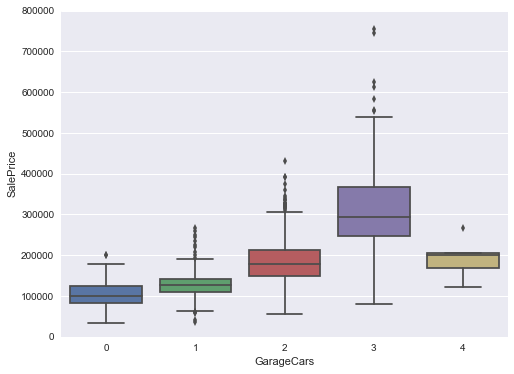

In [31]:
var = 'GarageCars'
qual_data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=qual_data)
fig.axis(ymin=0, ymax=800000);
